## 1st Exercise 

In this exercise you need to perform data cleaning and Text analysis using the news articles dataset provided in the data folder

path = '../Data/tz_national_news_articles.csv'




In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# text preprocessing modules
from string import punctuation

# sklearn module
from sklearn.feature_extraction.text import CountVectorizer

#wordcloud
from wordcloud import WordCloud

from collections import Counter

# text preprocessing modules
import nltk
from nltk.tokenize import word_tokenize

import re  #regular expression
import emoji

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

import warnings

warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

In [3]:
# load the dataset using pandas

data = pd.read_csv("../Data/tz_national_news_articles.csv")

In [4]:
# show the shape of the dataset
data.shape

(2000, 1)

In [5]:
# show the first 10 rows
data.head(10) 

,content
0,"KATIKA kuongeza kasi ya kuchapisha vitambulisho vya Taifa, Mamlaka ya Vitambulisho vya Taifa (N..."
1,"KAMPUNI 10 zimejitokeza kununua ufuta wa wilaya za Ruangwa, Nachingwea na Liwale mkoani Lindi k..."
2,TAKWIMU kutoka Hospitali ya Taifa Muhimbili (MNH) zinaonesha kuwa kuna wastani wa wagonjwa wa U...
3,IDADI ya vifo vya waendesha bodaboda nchini vitokanavyo na ajali imepungua katika kipindi cha r...
4,"SERIKALI imeyafuta mashamba sita yenye ukubwa wa hekari 12,915126 ya Kampuni ya Mohamed Enterpr..."
5,TAASISI ya Sekta Binafsi Tanzania (TPSF) imesema suala la vijana kukosa kazi litapungua baada y...
6,"KAMISHNA Jenerali wa Jeshi la Zimamoto na Uokoaji nchini, Thobias Andengenye amefanya mabadilik..."
7,"KATIKA kukuza sekta ya utalii nchini, Shirika la Utangazaji Tanzania (TBC) limeanzisha chaneli ..."
8,UAMUZI wa serikali ya Tanzania wa kuzuia kuchapishwa kwa ripoti ya Shirika la Fedha la Kimataif...
9,"ASKARI wa Jeshi la Polisi mwenye namba H. 9946, Konstebo Daniel wa Kituo cha Polisi Wilaya ya K..."


## Cleaning the Dataset

Cleaning text-data is a typical pre-processing task for data science and machine learning.

It consists of getting rid of the less useful parts of text through stopword removal, dealing with capitalization, special characters and other details.

### 1. Check Missing values

In [6]:
# check if the dataset has some missing values using pandas

data.isnull().sum() 

content    0
dtype: int64

The dataset does not have any missing values

### 2. Remove Numbers

In [9]:
# create the function 

# apply the function
def remove_digits(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'http\S+', '', text)
    
    return text 

# apply the function
data['content'] = data['content'].apply(remove_digits)

In [37]:
data.head()

,content,word_count
0,kuongeza kasi kuchapisha vitambulisho taifa mamlaka vitambulisho taifa nida inakamilisha mchakat...,307
1,kampuni zimejitokeza kununua ufuta wilaya ruangwa nachingwea liwale mkoani lindi kupitia chama c...,253
2,takwimu hospitali taifa muhimbili mnh zinaonesha wastani wagonjwa ukimwi wagonjwa ndio ambao wak...,191
3,idadi vifo waendesha bodaboda nchini vitokanavyo ajali imepungua kipindi robo kwanza mwaka kinac...,111
4,serikali imeyafuta mashamba sita yenye ukubwa hekari kampuni mohamed enterprises yaliyopo korogw...,198


### 3. Remove Punctuation

In [10]:
data.head()

,content
0,"KATIKA kuongeza kasi ya kuchapisha vitambulisho vya Taifa, Mamlaka ya Vitambulisho vya Taifa (N..."
1,"KAMPUNI zimejitokeza kununua ufuta wa wilaya za Ruangwa, Nachingwea na Liwale mkoani Lindi kup..."
2,TAKWIMU kutoka Hospitali ya Taifa Muhimbili (MNH) zinaonesha kuwa kuna wastani wa wagonjwa wa U...
3,IDADI ya vifo vya waendesha bodaboda nchini vitokanavyo na ajali imepungua katika kipindi cha r...
4,"SERIKALI imeyafuta mashamba sita yenye ukubwa wa hekari , ya Kampuni ya Mohamed Enterprises, ya..."


In [16]:
# create the function 

# apply the function
def remove_punc(text):
    text = ''.join([c for c in text if c not in punctuation])
    
    return text 


# apply the function 

data['content'] = data['content'].apply(remove_punc)


### 4. Normalize case into Lower Case

In [18]:
# convert the text to lowercase
data['content'] = data['content'].str.lower() 

### 5. Remove Stopwords 


In [21]:
# list of swahili stop words
swahili_stopwords = [
    'akasema', 'alikuwa', 'alisema', 'baada', 'basi', 'bila', 'cha', 'chini',
    'hadi', 'hapo', 'hata', 'hivyo', 'hiyo', 'huku', 'huo', 'ila', 'ili',
    'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila', 'kima', 'kisha',
    'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la',
    'lakini', 'mara', 'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda',
    'mwenye', 'na', 'naye', 'ndani', 'ni', 'nini', 'nonkungu', 'pamoja', 'pia',
    'sana', 'sasa', 'sauti', 'tafadhali', 'tena', 'tu', 'vile', 'wa', 'wakati',
    'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'hivi', 'huu',
    'hii', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'vya', 'za', 't', 'co',
    'kuna', 'nie', 'kati', 'ile', 'tz', 'au', 'tanzania', 'zaidi', 'zake',
    'si', 'mm', 'ndo', 'hapa', 'je', 'hawa', 'nyie','wewe','hiki'
]

In [22]:
# function to remove stopwords 

def remove_stopwords(text):
    text = text.split()
    text = [w for w in text if not w in swahili_stopwords]
    text = " ".join(text)
    
    return text
    

In [23]:
# remove stopwords presented on the collection of news articles
data['content'] = data['content'].apply(remove_stopwords)

### 6. Replace Values

In [26]:
# create a function replace links with a word called "tovuti" 

def replace_value(text):
    text = re.sub(r'http\S+','tovuti', text)
    
    return text 

# apply the function

data['content'] = data['content'].apply(replace_value)


In [25]:
data.head()

,content
0,kuongeza kasi kuchapisha vitambulisho taifa mamlaka vitambulisho taifa nida inakamilisha mchakat...
1,kampuni zimejitokeza kununua ufuta wilaya ruangwa nachingwea liwale mkoani lindi kupitia chama c...
2,takwimu hospitali taifa muhimbili mnh zinaonesha wastani wagonjwa ukimwi wagonjwa ndio ambao wak...
3,idadi vifo waendesha bodaboda nchini vitokanavyo ajali imepungua kipindi robo kwanza mwaka kinac...
4,serikali imeyafuta mashamba sita yenye ukubwa hekari kampuni mohamed enterprises yaliyopo korogw...


### 7. Remove Emojis


In [13]:
#create function

def remove_emoji(text):
    # Remove emojis using the emoji library
    #text = emoji.get_emoji_regexp().sub("", text)
    return text

#apply the function
data['content'] = data['content'].apply(remove_emoji)

#apply the function


In [27]:
# show cleaned comment
data.head(10)

,content
0,kuongeza kasi kuchapisha vitambulisho taifa mamlaka vitambulisho taifa nida inakamilisha mchakat...
1,kampuni zimejitokeza kununua ufuta wilaya ruangwa nachingwea liwale mkoani lindi kupitia chama c...
2,takwimu hospitali taifa muhimbili mnh zinaonesha wastani wagonjwa ukimwi wagonjwa ndio ambao wak...
3,idadi vifo waendesha bodaboda nchini vitokanavyo ajali imepungua kipindi robo kwanza mwaka kinac...
4,serikali imeyafuta mashamba sita yenye ukubwa hekari kampuni mohamed enterprises yaliyopo korogw...
5,taasisi sekta binafsi tpsf imesema suala vijana kukosa kazi litapungua kuanzishwa mabaraza ujuzi...
6,kamishna jenerali jeshi zimamoto uokoaji nchini thobias andengenye amefanya mabadiliko baadhi ma...
7,kukuza sekta utalii nchini shirika utangazaji tbc limeanzisha chaneli utalii inayoitwa ‘tanzania...
8,uamuzi serikali kuzuia kuchapishwa ripoti shirika fedha kimataifa imf kuhusu hali uchumi nchini ...
9,askari jeshi polisi namba h konstebo daniel kituo polisi wilaya kyela mkoani mbeya anasakwa poli...


## Text Analysis

### 1. Total Words

Find the total number of words in the collection of all documents

In [28]:
# Split comments into words

content = data['content']

words = content.str.split()

# Calculate total number of words
total_words = words.apply(len).sum()

# Print the results
print("Total number of words:", total_words)


Total number of words: 487594


### 2. Unique Words

Find total number of uniques words presented in the collection of all documents

In [29]:
# Calculate total number of unique words

unique_words = set([word for sublist in words for word in sublist])
total_unique_words = len(unique_words)

print("Total number of unique words:", total_unique_words)

Total number of unique words: 57655


### 3.Visualize Top Words

Visualizing the top words allows you to quickly identify the most frequently occurring terms in the text corpus. This can provide a high-level overview of the prominent topics or themes present in the data

In [30]:
# Write a python code to collect all words presented in the collection of documents(articles)

corpus = []
content = data['content'].str.split()
content = content.values.tolist()
corpus = [word for i in content for word in i]


<Axes: >

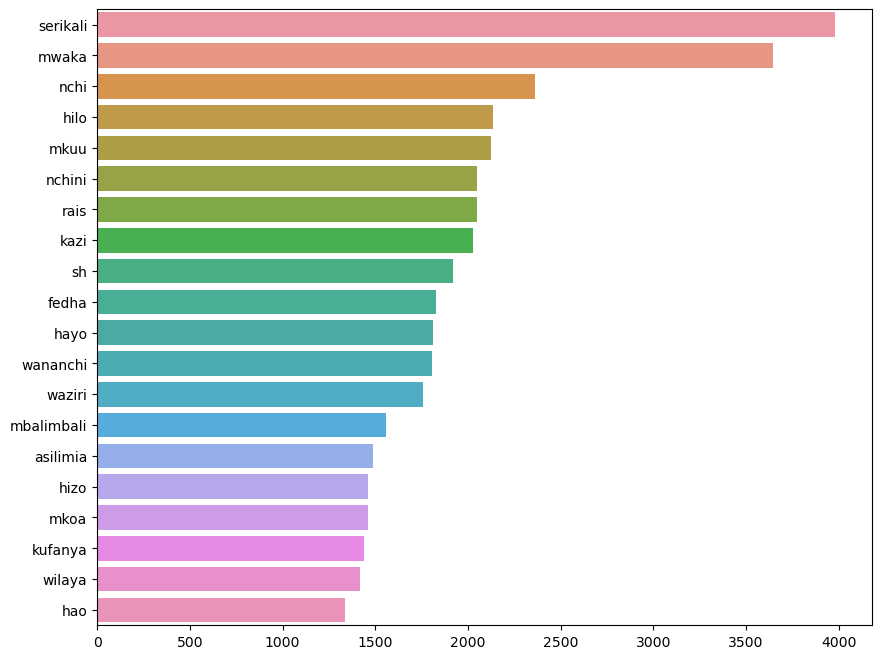

In [31]:
# Create a python code visualize the top 20 words using seaborn 

counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:20]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(10,8))
sns.barplot(x=y, y=x)

### 4. Explore With WordCloud


In [32]:
# Create a function to explore wordcloud

def explore_wordcloud(data):
    wordcloud = WordCloud(background_color='white',
                          max_words=50,
                          max_font_size=20,
                          scale=3,
                          random_state=134)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


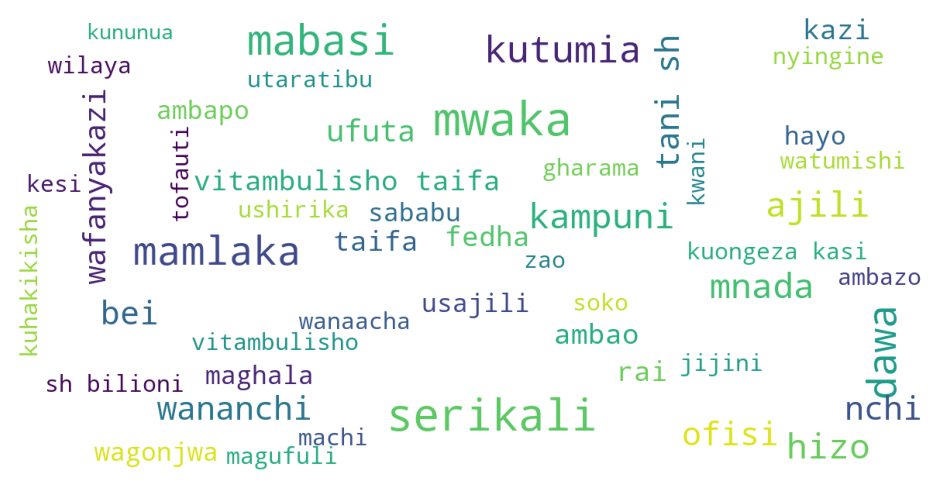

In [33]:
# show world cloud using the function you created

content = "".join(data['content'].tolist())
explore_wordcloud(data['content'].values)


### 5. Word Length Analysis

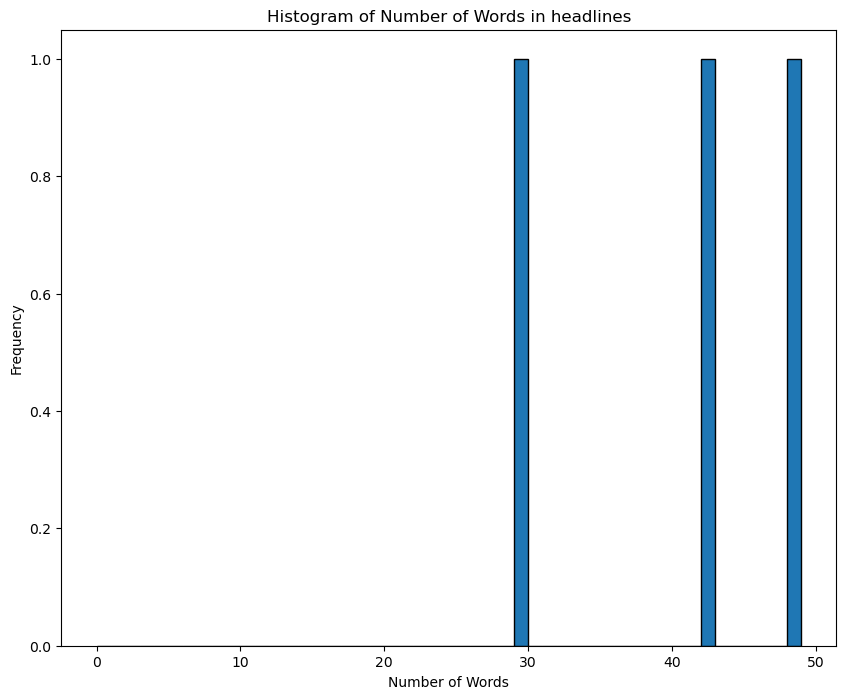

In [36]:
# Create a pyton code to tokenize the sentences into words and calculate the word count

# set the figure size of your graph using matplotlib

data['word_count'] = data['content'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,8))
# Create the histogram
plt.hist(data['word_count'], bins=range(0, 50), edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Number of Words in headlines')

# Show the plot
plt.show()

In [35]:
#save cleaned data using pandas package
data.to_csv('../Data/tz_national_news_articles_clean_data.csv', index=False)